# Full analysis

Just to make sure that things make sense

In [4]:
import glob
import numpy as np
from scipy import fftpack
# %matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt 
from matplotlib.backends.backend_pdf import PdfPages


# Some expectations

In [5]:
import scipy.signal as sig

def gaussian(x,mu,sig):
    return (sig*np.sqrt(2*np.pi))**-1 * np.exp(-0.5*(((x-mu)/sig)**2))

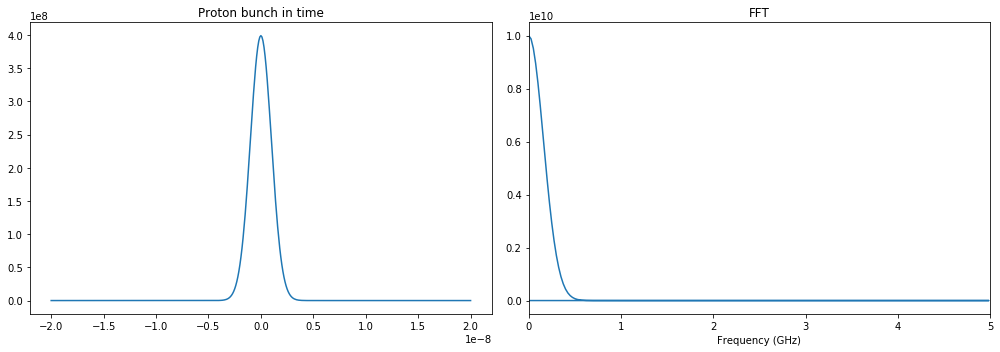

In [6]:
# let's see the spectrum at different bunch lengths
## timescale --> -20 to +20 ns at 0.1 ns sampling 
## Proton beam ~ 1 ns long
## Electron beam ~ 1 ps long
xdata1 = 1e-9*np.linspace(-20, 20, 401)
ydata1 = gaussian(xdata1, mu=0, sig=1e-9)

f_spectrum_complex = fftpack.fft(ydata1)
freqs = fftpack.fftfreq(ydata1.size, d=0.1e-9 )
f_spectrum_abs = np.abs(f_spectrum_complex)


fig, ax = plt.subplots(1,2,figsize=(14,5))
ax[0].plot(xdata1, ydata1)
ax[0].set_title('Proton bunch in time')

ax[1].plot(1e-9*freqs, f_spectrum_abs)
ax[1].set_title('FFT')
ax[1].set_xlim(0,5)
ax[1].set_xlabel('Frequency (GHz)')

fig.tight_layout()

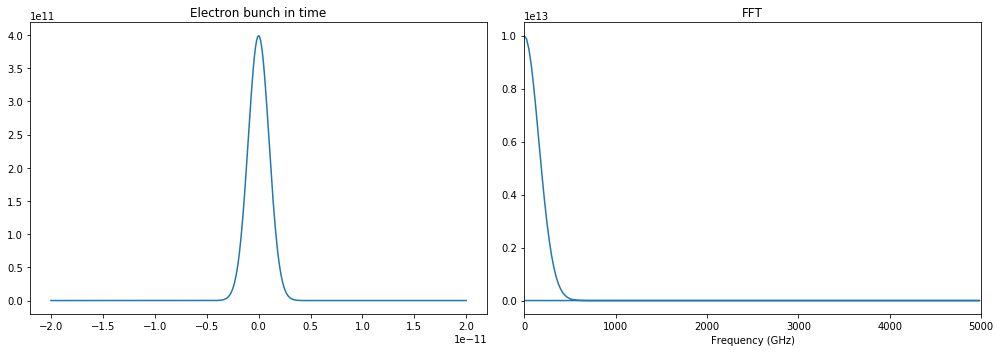

In [7]:
# let's see the spectrum at different bunch lengths
## timescale --> -20 to +20 ns at 0.1 ns sampling 
## Proton beam ~ 1 ns long
## Electron beam ~ 1 ps long
xdata1 = 1e-12*np.linspace(-20, 20, 401)
ydata1 = gaussian(xdata1, mu=0, sig=1e-12)

f_spectrum_complex = fftpack.fft(ydata1)
freqs = fftpack.fftfreq(ydata1.size, d=0.1e-12 )
f_spectrum_abs = np.abs(f_spectrum_complex)


fig, ax = plt.subplots(1,2,figsize=(14,5))
ax[0].plot(xdata1, ydata1)
ax[0].set_title('Electron bunch in time')

ax[1].plot(1e-9*freqs, f_spectrum_abs)
ax[1].set_title('FFT')
ax[1].set_xlim(0,5000)
ax[1].set_xlabel('Frequency (GHz)')

fig.tight_layout()

In [8]:
'''... cool but this is the bunch spectrum, not the signal on the plates !'''

'... cool but this is the bunch spectrum, not the signal on the plates !'

# Try to get some delta/sigma

In [9]:
folders = ['0_setup_protons',
'1_protons_1e11_both_ch',
'2_protons_1e11_ch1_high_BW',
'3_protons_1e11_both_untiltheend',
'4_electrons_600pC_ch1_high_BW',
'5_electrons_600pC_ch1_both_ch',
'6_electrons_steering_both_ch_reference',
'7_electrons_steering_both_ch_-5mm',
'8_electrons_steering_both_ch_0',
'9_electrons_steering_both_ch_+5mm',
'10_protons_2e11_2ch',
'11_protons_2e11_ch1_high_BW',
'12_protons+electrons_2ch_simultaneous',
'13_protons+electrons_ch1_simultaneous',
'14_protons+electrons_2ch_simultaneous_electron_bump+5mm',
'15_protons+electrons_2ch_simultaneous_electron_bump-5mm',
'16_protons+electrons_1ch_simultaneous_electron_bump-5mm',
'17_protons+electrons_1ch_simultaneous_electron_bump_in_centre',
'18_protons+electrons_1ch_simultaneous_electron_bump+5mm',
'19_electrons_ahead_3ns_zoom',
'20_electrons_ahead_2ch',
'21_electrons_ahead_3ns_ch1',
'22_electrons_behind_3ns_2ch',
'23_electrons_behind_3ns_ch1',
'24_until_the_last_proton_beam_alone_2ch']

paths = ['./data/'+f+'/*.txt' for f in folders]

files = [sorted(glob.glob(p)) for p in paths]

In [10]:
def gimme(data_path, header_len=5):
    '''
    Produce the output of the single file analysis:
    
    data_path: the file including path
    
    data[0]: the timescale of the trace
    data[1]: the signal of the trace
    t_sampl: the sampling time
    freqs: the FFT frequency scale (the x axis in practice)
    f_spectrum_complex: the FFT output. Complex numbers.
    f_spectrum_abs: the FFT output. Complex numbers.

    '''
    data = np.loadtxt(data_path, delimiter=' ', skiprows=header_len)
    data = data.transpose()
    t_sampl = np.abs(data[0][0]-data[0][1])
    
    f_spectrum_complex = fftpack.fft(data[1])
    freqs = fftpack.fftfreq(data[1].size, d=t_sampl )
    
    f_spectrum_abs = np.abs(f_spectrum_complex)
    
    return data[0], data[1], t_sampl, freqs, f_spectrum_complex, f_spectrum_abs

def plotme(tt, yy, t_sampl, f_xx, f_yy, message):
    fig, ax = plt.subplots(2,1, figsize=(10,8), dpi=90)
    ax[0].plot(1e9*tt, yy)
    ax[0].set_xlabel('Time (ns)')
    ax[0].set_ylabel('Intensity (arb.u.)')
    ax[0].set_xticks(np.arange(1e9*np.min(tt), 1e9*np.max(tt), step=10), minor=True)
    ax[0].set_xticks(np.arange(1e9*np.min(tt), 1e9*np.max(tt), step=50), minor=False)    
    ax[0].set_yticks(np.arange(np.min(yy), np.max(yy), step=(np.max(yy)-np.min(yy))/5), minor=True)
    ax[0].set_yticks(np.arange(np.min(yy), np.max(yy), step=(np.max(yy)-np.min(yy))/10), minor=False)
    ax[0].grid()
    ax[0].grid(which='minor',alpha=0.4,linestyle='--')
    ax[0].set_title(message)

    ax[1].plot(1e-9*f_xx, f_yy)
    ax[1].set_xlabel('Frequency (GHz)')
    ax[1].set_ylabel('Absolute FFT (arb.u.)')
    ax[1].set_xlim(0, 20)
    ax[1].set_xticks(np.arange(0, 20, step=1), minor=True)
    ax[1].set_xticks(np.arange(0, 20, step=5), minor=False)
    ax[1].grid()
    ax[1].grid(which='minor',alpha=0.4,linestyle='--')
    ax[1].grid(axis='y',which='major',alpha=0.4,linestyle='--')



    return fig

def gimmeee(data_path, message):
    '''
    Same of gimme but also plot
    '''
    
    a,b,c,d,e,f = gimme(data_path)
    ff = plotme(a,b,c,d,f, message)
    
    return ff
    

In [11]:
# load the protons
ch1 = gimme(files[10][5])
ch2 = gimme(files[10][16])

In [13]:
# load the two plates (electrons)
ch1 = gimme(files[5][5])
ch2 = gimme(files[5][107])

ch1_n5mm = gimme(files[7][5])
ch2_n5mm = gimme(files[7][65])

ch1_5mm = gimme(files[9][5])
ch2_5mm = gimme(files[9][103])

# the idea: interpolate the 12 GHz signal to get the delta

In [14]:
ch1_interp = np.interp(ch2[0], ch1[0], ch1[1])
ch1_interp_n5mm = np.interp(ch2_n5mm[0], ch1_n5mm[0], ch1_n5mm[1])
ch1_interp_5mm = np.interp(ch2_5mm[0], ch1_5mm[0], ch1_5mm[1])


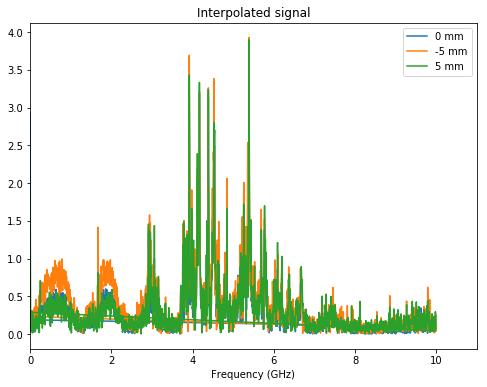

In [15]:
fig, ax = plt.subplots(1, figsize=(8,6))
def print_fft(fig, ax, tscale, signal, lab):
    f_spectrum = np.abs(fftpack.fft(signal))
    freqs = fftpack.fftfreq(tscale.size, d=tscale[1]-tscale[0] )

    ax.plot(freqs*1e-9, f_spectrum,label=lab)
    ax.set_xlim(0, )
    ax.set_xlabel('Frequency (GHz)')
    ax.legend(frameon=True)
    ax.set_title('Interpolated signal')
    
print_fft(fig, ax, ch2[0], ch1_interp,'0 mm')
print_fft(fig, ax, ch2[0], ch1_interp_n5mm,'-5 mm')
print_fft(fig, ax, ch2[0], ch1_interp_5mm,'5 mm')


In [14]:
%matplotlib inline

(-2e-09, 2e-08)

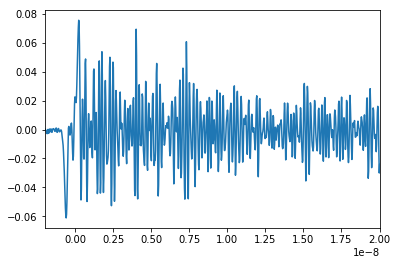

In [20]:
plt.plot(ch1[0],ch1[1])

plt.xlim(-.2e-8, 2e-8)



Electron beam bumps: 


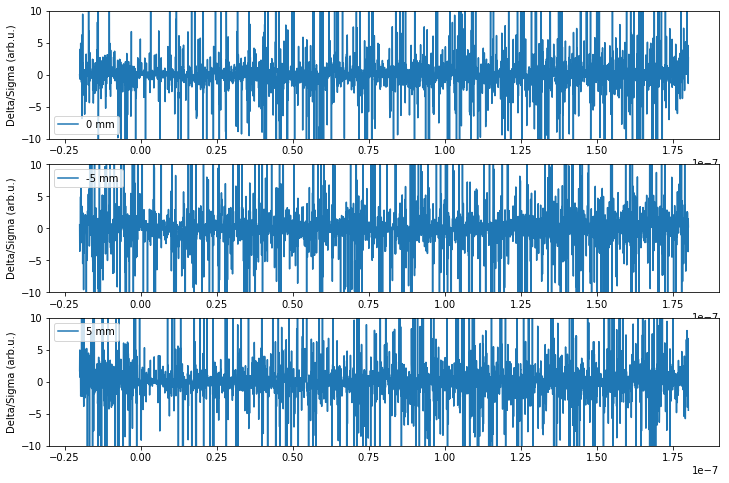

In [18]:
fig, ax = plt.subplots(3, 1, figsize=(12,8))
def plot_delta_sigma(fig, ax, tscale, ch1, ch2,lab=''):
    delta = ch1-ch2
    sigma = ch1+ch2
    ax.plot(tscale, delta/sigma,label=lab)
    ax.set_ylim(-10, 10)
    ax.set_ylabel('Delta/Sigma (arb.u.)')
    ax.legend(frameon=True)

plot_delta_sigma(fig, ax[0], ch2[0], ch1_interp, ch2[1],'0 mm')
plot_delta_sigma(fig, ax[1], ch2[0], ch1_interp_n5mm, ch2_n5mm[1],'-5 mm')
plot_delta_sigma(fig, ax[2], ch2[0], ch1_interp_5mm, ch2_5mm[1],'5 mm')

print('\nElectron beam bumps: ')

In [27]:
def delta_sigma_rms(fig, ax, tscale, ch1, ch2,lab=''):
    print(lab)
    delta = np.std(ch1)-np.std(ch2)
    sigma = np.std(ch1)+np.std(ch2)
    print(delta/sigma)

delta_sigma_rms(fig, ax[0], ch2[0], ch1_interp, ch2[1],'0 mm')
delta_sigma_rms(fig, ax[1], ch2[0], ch1_interp_n5mm, ch2_n5mm[1],'-5 mm')
delta_sigma_rms(fig, ax[2], ch2[0], ch1_interp_5mm, ch2_5mm[1],'5 mm')



0 mm
0.049391950864872594
-5 mm
0.12325221069634361
5 mm
-0.01451741442335744


In [ ]:
- same with rms
- FFT withouyt the beam signal